In [256]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [257]:
file_path = '../output/cmp123_crit_numcores_util03_logunif/'
files = sorted(os.listdir(file_path))

cfg = get_config('../cfg/cmp123_crit_numcore_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

only_ls = [0.0] * len(criticality_prob_list)
ds = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [258]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_ls, core_ds, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    only_ls[index] += core_ls
    ds[index] += core_ds
    ours[index] += core_ours

In [259]:
# only_ls_vir = []
# for i in range(11) :
#     only_ls_vir.append(12.08)

print(only_ls)
print(ds)
print(ours)


[3.86, 5.92, 6.34, 7.28, 8.34, 9.3, 9.56, 11.0, 11.58, 12.0, 12.08]
[5.92, 6.28, 6.66, 6.56, 7.28, 8.18, 8.28, 8.92, 10.34, 11.16, 12.08]
[5.92, 5.92, 6.08, 5.72, 6.26, 7.48, 7.38, 8.3, 9.86, 10.76, 12.08]


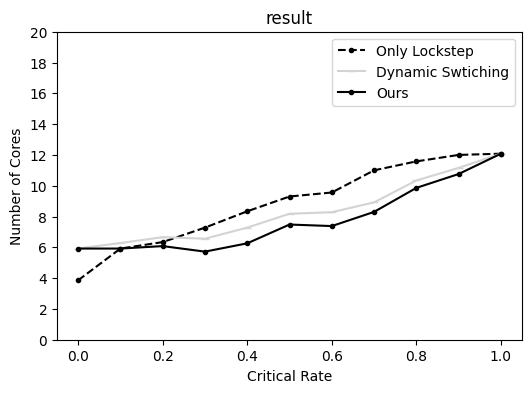

In [260]:
plt.figure(figsize=(6,4))

ax = plt.gca() 

plt.plot(criticality_prob_list, only_ls, label='Only Lockstep', color='black', linestyle='dashed', marker='.')
plt.plot(criticality_prob_list, ds, label='Dynamic Swtiching', color='lightgray', marker='_')
plt.plot(criticality_prob_list, ours, label='Ours', color='black', marker='.')

plt.title('result')
plt.xlabel('Critical Rate')
plt.ylabel('Number of Cores')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylim(0,20)
plt.legend()
plt.show()